##Título

O dataset aborda um conjunto de alunos que realizaram um simulado chamado PU (Prova única).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Passos realizados:

*  Importações das bibliotecas que serão utilizadas (bloco 1)
*  Importação do Arquivo ao ambiente do Colab (bloco 2)

O comando files.upload() retorna um dicionario, onde a key é o nome do arquivo e o value é o conteúdo desse arquivo, então criamos uma lista a partir das keys do dicionário (o nome dos arquivos) e seu primeiro termo (que é o dataset a ser analisado). Por fim transformamos o arquivo do Excel em um dataframe.



In [1]:
from google.colab import files
uploaded = files.upload()
Nome_Arquivo = list(uploaded.keys())[0]

df = pd.read_excel(Nome_Arquivo)
df.head()

IndexError: list index out of range

Foi identificado praças iguais (EX: Belo Horizonte -> BH. Eu resolvi mudar lá no Excel mesmo, pois eram poucas linhas)

##BLOCO 1

Ideia:Construa uma base em que cada aluno aparecerá uma única vez e as informações de cada uma das áreas estarão em **colunas**. Utilize a coluna de “ENEM_Projetado” de cada um dos cadernos.

Mostre como você automatizou esse processo.

Ideia: Agrupar as linhas por RA e transpor a coluna "Área" para que possamos ver a nota do ENEM_PROJETADO para cada área de cada aluno, se possivel, plotar um gráfico.

Para isso, utilizaremos apenas 3 colunas.

In [ ]:
df1= df.copy()

In [ ]:
df1 = df1.drop(["NOME COMPLETO", "ORIGEM","PRACA","PROFICIÊNCIAS","ES","NOTA DESEMPENHO", "Nivel_Desempenho","Media_ENEM","Nivel_ENEM","Nivel_ENEM_Projetado","C01","C02","C03","C04","C05","C06","C07","C08","C09"], axis=1)
df1.head()

,RA,ÁREA,ENEM_Projetado
0,2545,CN,657.264709
1,2545,MA,728.627545
2,2545,LI,667.513141
3,2545,CH,695.906615
4,2547,MA,646.646025


In [ ]:
pivoted_sample = pd.pivot_table(df1, index = 'RA', columns = 'ÁREA', values = 'ENEM_Projetado')

Bloco 1 Concluído, as linhas são o RA de forma única, as colunas são as áreas e em cada área tem os valores do ENEM Projetado. Do mesmo modo que foi solicitado utilizando os códigos acima.

In [ ]:
pivoted_sample

ÁREA,CH,CN,LI,MA
RA,,,,
2545,695.906615,657.264709,667.513141,728.627545
2547,680.436229,471.296044,655.513717,646.646025
2550,658.077029,618.081889,692.623383,763.575095
2551,732.934631,682.165971,720.693663,736.060302
2553,838.758293,870.382180,770.807568,776.047159
...,...,...,...,...
2023039955,NaN,NaN,557.072414,535.628688
2023039977,NaN,NaN,676.637497,650.535841
2023039978,NaN,NaN,585.958040,550.217349


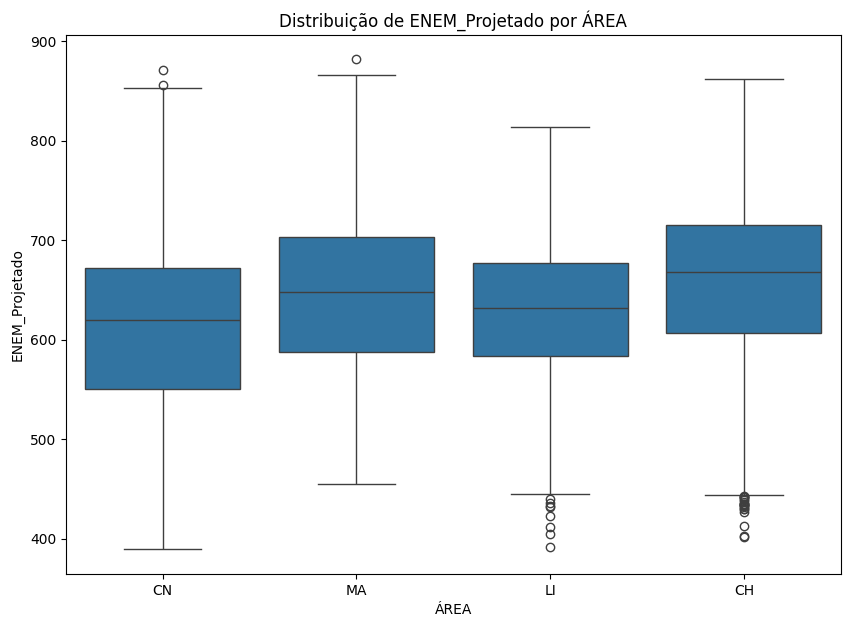

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='ÁREA', y='ENEM_Projetado', data=df)
plt.title('Distribuição de ENEM_Projetado por ÁREA')
plt.xlabel('ÁREA')
plt.ylabel('ENEM_Projetado')
plt.show()

##BLOCO 2

1. Há alguma correlação entre as três diferentes notas da Prova (NOTA
DESEMPENHO, Media_ENEM e ENEM_Projetado)?
Para isso, vou pegar todos as colunas numéricas do nosso dataframe

OBS: A divisão de praças foram dividas em coisas como 'SP' e 'SÃO PAULO', e nós conseguiríamos juntar essas duas colunas simplesmente substituindo o nome da linha SÃO PAULO por SP, mas resolvi não fazer pois acredito que houvessem motivos internos, e por falta de comunicação com a equipe neste estudo de caso

In [ ]:
numerical_columns = df.select_dtypes(include=['number'])

In [ ]:
numerical_columnsreal = numerical_columns.drop(["RA"], axis=1)

<Axes: >

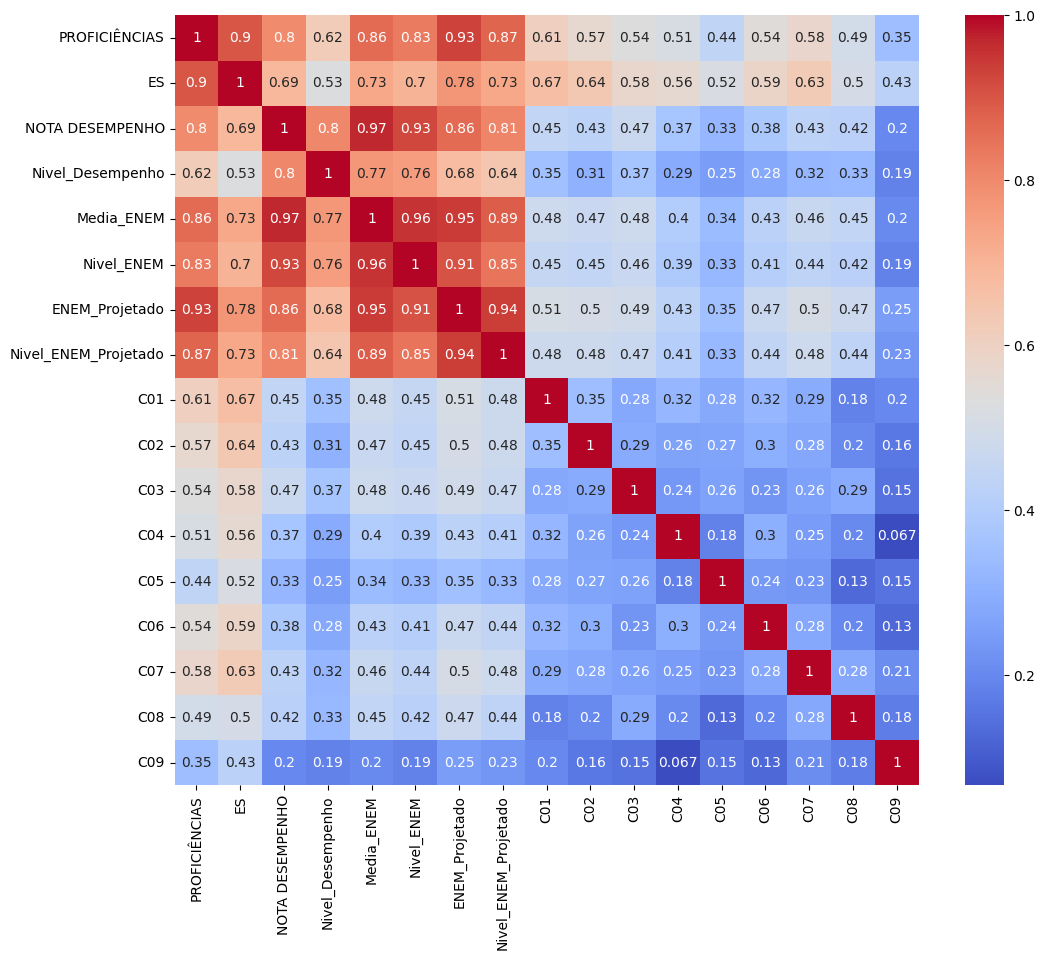

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_columnsreal.corr(), annot=True, cmap='coolwarm')

SIM, as variaveis estão FORTEMENTE CORRELACIONADAS, o desempenho do simulado está fortemente correlacionado com o nível_ENEM, e também está fortemente correlacionado com a projeção do ENEM, o que indica que os simulados estão se saindo bem em replicar o nível que é a prova do Enem.


2. Elabore um gráfico que compare as médias de Enem Projetado de 2023 de
cada Praça. Qual a praça com a maior média?

##OBS
Percebi que Existem colunas iguais, acredito que daria pra tratarmos isso criando dois dataframes e utilizando a função "append", ou talvez utilizando a função "merge" com full join. Porém eu não sei se as praças foram chamadas assim por confusão de quem criou a planilha ou se foi algo proposital
(Ex: São Paulo pode ser a representação de 1 praça, SP outra praça e SAO PAULO outra praça).

In [ ]:
df2 = df.copy()


In [ ]:
x = df2.groupby(['PRACA'])['ENEM_Projetado'].mean()

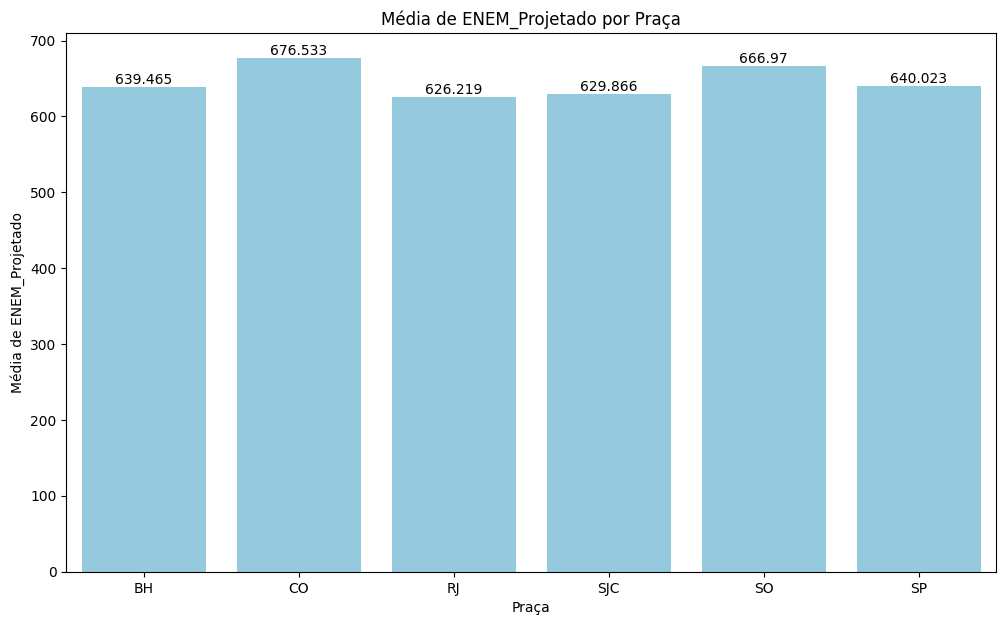

In [ ]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=x.index, y=x.values, color='skyblue',)
plt.xlabel('Praça')
plt.ylabel('Média de ENEM_Projetado')
plt.title('Média de ENEM_Projetado por Praça')
for i in ax.containers:
    ax.bar_label(i,)

 3. Realize uma análise exploratória e gere pelo menos duas conclusões que
poderiam resultar em alguma ação do time que cuida dos alunos a fim de
melhorar os resultados da prova. (por exemplo: direcionar reforço
acadêmico de alguma disciplina para alguma praça específica).

1. Nome completo - Nome do estudante que realizou a PU
2. RA - Registro único do estudante
3. Origem - dividido em IB, IOL e vazios, acredito que os vazios sejam aqueles que não são nem IB e nem IOL, chamaremos de "Outros" mais pra frente
4. Praça - Cidade onde o estudante reside?
5. Área - Tema do simulado, sendo 4 áreas, e pra alguns casos, 2 áreas apenas
6. Proficiência - Não tenho ideia do que seja, talvez seja alguma métrica específica visto que esta variável está bem relacionada com os desempenhos dos alunos
7. ES - Estando em porcentagem e indo de 0 a 100, acredito que seja a porcentagem de acerto do aluno referente ao respectivo simulado
8. Nota_Desempenho - A nota do aluno com base nos acertos, acredito que pela forte correlação com a nota do enem, este simulado buscou simular também o próprio sistema TRI
9. Nível_ Desempenho - Categorias do desempenho dos alunos
1:0 - 449;
2: 450-749;
3: 750 - 1000;
10. Média que o aluno tirou no ENEM
11. Categoria dos desempenho no ENEM aos mesmos parâmetros que foi a coluna 9
12. Acredito que seja a projeção esperada do aluno com base no simulado
13. Categoria dos desempenho da projeção aos mesmos parâmetros que foi a coluna 9
colunas 14 até 22: Não sei o que significam, elas não tem correlação com as variáveis acima e por isso serão descartadas.

##Perguntas

In [ ]:
df.head()


,NOME COMPLETO,RA,ORIGEM,PRACA,ÁREA,PROFICIÊNCIAS,ES,NOTA DESEMPENHO,Nivel_Desempenho,Media_ENEM,...,Nivel_ENEM_Projetado,C01,C02,C03,C04,C05,C06,C07,C08,C09
0,ALINE,2545,EB,SP,CN,0.463427,0.533333,646.164709,2,646.164709,...,4,0.400000,0.000000,0.250000,0.800000,0.5,0.333333,0.800000,0.666667,NaN
1,ALINE,2545,EB,SP,MA,0.976110,0.633333,703.470689,2,713.927545,...,4,0.714286,0.333333,0.333333,0.750000,1.0,1.000000,0.333333,NaN,NaN
2,ALINE,2545,EB,SP,LI,0.441631,0.633333,644.347734,2,654.713141,...,4,0.428571,0.750000,1.000000,0.000000,1.0,0.000000,1.000000,0.250000,0.8
3,ALINE,2545,EB,SP,CH,0.740057,0.666667,684.606615,2,684.606615,...,4,0.666667,1.000000,0.625000,0.666667,0.2,1.000000,NaN,NaN,NaN
4,BARBARA,2547,EB,SP,MA,-0.053221,0.366667,585.086031,2,631.946025,...,3,0.142857,0.666667,0.333333,0.250000,0.5,0.333333,0.666667,NaN,NaN


In [ ]:
df_test = df.iloc[:, list(range(0,13))]

In [ ]:
df_test

,NOME COMPLETO,RA,ORIGEM,PRACA,ÁREA,PROFICIÊNCIAS,ES,NOTA DESEMPENHO,Nivel_Desempenho,Media_ENEM,Nivel_ENEM,ENEM_Projetado,Nivel_ENEM_Projetado
0,ALINE,2545,EB,SP,CN,0.463427,0.533333,646.164709,2,646.164709,3,657.264709,4
1,ALINE,2545,EB,SP,MA,0.976110,0.633333,703.470689,2,713.927545,4,728.627545,4
2,ALINE,2545,EB,SP,LI,0.441631,0.633333,644.347734,2,654.713141,4,667.513141,4
3,ALINE,2545,EB,SP,CH,0.740057,0.666667,684.606615,2,684.606615,4,695.906615,4
4,BARBARA,2547,EB,SP,MA,-0.053221,0.366667,585.086031,2,631.946025,3,646.646025,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7720,ANA,2023039978,IOL,RJ,MA,-0.754209,0.333333,313.593303,1,433.717349,1,550.217349,3
7721,CAMILA,2023039981,IOL,SP,MA,-0.761678,0.291667,312.616965,1,432.975623,1,549.475623,2
7722,CAMILA,2023039981,IOL,SP,LI,-0.338223,0.416667,411.365785,1,489.688948,2,559.988948,3
7723,YASMIN,2023039993,IOL,SJC,MA,-0.695409,0.291667,321.278773,1,439.556015,1,556.056015,3


In [ ]:
df_test['ORIGEM'].fillna('Outros', inplace=True)

<ipython-input-114-4d3fb7b9d211>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['ORIGEM'].fillna('Outros', inplace=True)
<ipython-input-114-4d3fb7b9d211>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['ORIGEM'].fillna('Outros', inplace=True)


In [ ]:
df_test['ORIGEM'] = df['ORIGEM'].astype('string')

<ipython-input-115-b847f66ce259>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['ORIGEM'] = df['ORIGEM'].astype('string')


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7725 entries, 0 to 7724
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NOME COMPLETO         7725 non-null   object 
 1   RA                    7725 non-null   int64  
 2   ORIGEM                7717 non-null   string 
 3   PRACA                 7725 non-null   object 
 4   ÁREA                  7725 non-null   object 
 5   PROFICIÊNCIAS         7725 non-null   float64
 6   ES                    7725 non-null   float64
 7   NOTA DESEMPENHO       7725 non-null   float64
 8   Nivel_Desempenho      7725 non-null   int64  
 9   Media_ENEM            7725 non-null   float64
 10  Nivel_ENEM            7725 non-null   int64  
 11  ENEM_Projetado        7725 non-null   float64
 12  Nivel_ENEM_Projetado  7725 non-null   int64  
dtypes: float64(5), int64(4), object(3), string(1)
memory usage: 784.7+ KB


In [ ]:
df_p1 = df_test.copy()

In [ ]:
df_p1.head()

,NOME COMPLETO,RA,ORIGEM,PRACA,ÁREA,PROFICIÊNCIAS,ES,NOTA DESEMPENHO,Nivel_Desempenho,Media_ENEM,Nivel_ENEM,ENEM_Projetado,Nivel_ENEM_Projetado
0,ALINE,2545,EB,SP,CN,0.463427,0.533333,646.164709,2,646.164709,3,657.264709,4
1,ALINE,2545,EB,SP,MA,0.976110,0.633333,703.470689,2,713.927545,4,728.627545,4
2,ALINE,2545,EB,SP,LI,0.441631,0.633333,644.347734,2,654.713141,4,667.513141,4
3,ALINE,2545,EB,SP,CH,0.740057,0.666667,684.606615,2,684.606615,4,695.906615,4
4,BARBARA,2547,EB,SP,MA,-0.053221,0.366667,585.086031,2,631.946025,3,646.646025,3


In [ ]:

df_p1['ENEM_Projetado'].fillna('Não realizaram', inplace=True)

<ipython-input-119-e3c29008306e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_p1['ENEM_Projetado'].fillna('Não realizaram', inplace=True)


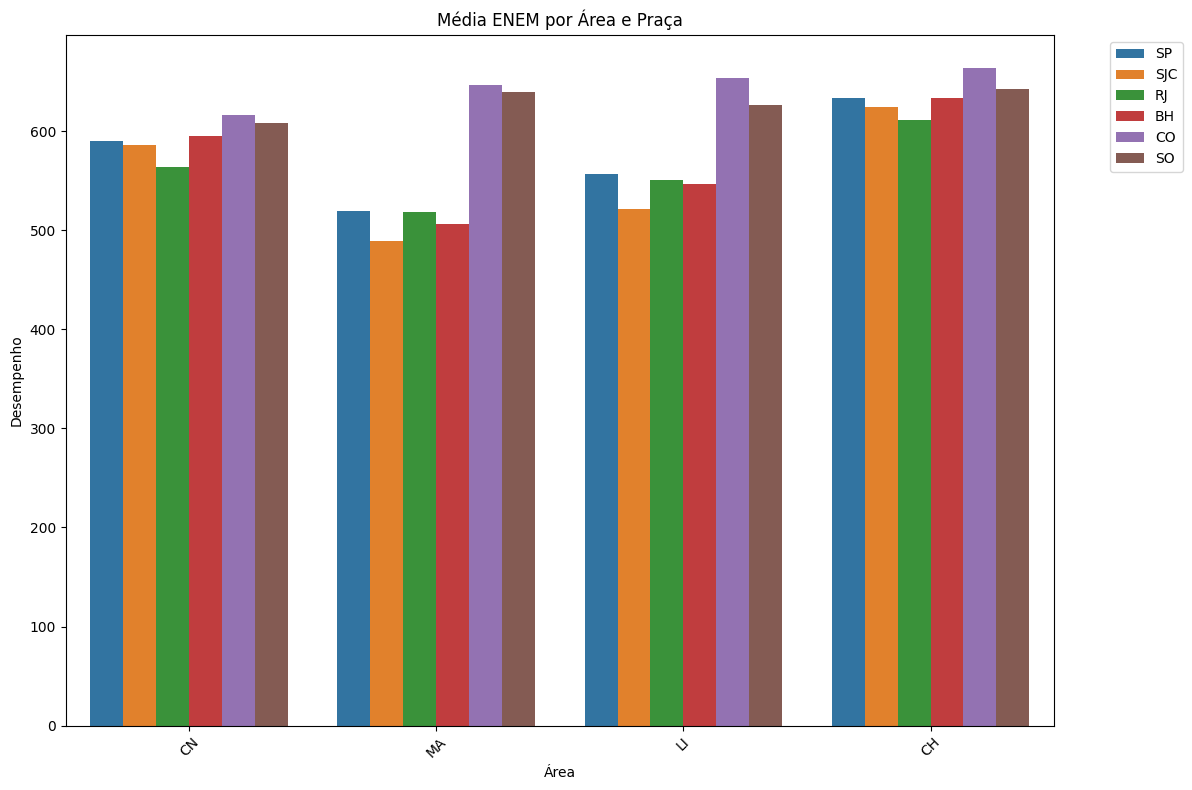

In [ ]:


plt.figure(figsize=(12, 8))
sns.barplot(x='ÁREA', y='NOTA DESEMPENHO', hue='PRACA', data=df_p1, errorbar=None,)
plt.title('Média ENEM por Área e Praça')
plt.xlabel('Área')
plt.ylabel('Desempenho')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Os esforços acadêmicos, com base no gráfico, devem ser direcionados na verdade na área de matemática, que apresentou uma discrepância muito alta em relação às outras matérias. Também é interessante ver como SO( acredito ser Sorocaba) e CO se destacaram, indicando a ótima performance dos alunos

In [ ]:
df_p2 = df_test.copy()

In [ ]:
df_p2.drop(['ORIGEM', 'Nivel_ENEM', 'PRACA', 'ÁREA', 'NOME COMPLETO', 'PROFICIÊNCIAS','ES','Nivel_Desempenho',], inplace = True, axis = 1)

In [ ]:
df_p2.drop(['RA','Nivel_ENEM_Projetado'], inplace = True, axis = 1)

In [ ]:
df_p2

,NOTA DESEMPENHO,Media_ENEM,ENEM_Projetado
0,646.164709,646.164709,657.264709
1,703.470689,713.927545,728.627545
2,644.347734,654.713141,667.513141
3,684.606615,684.606615,695.906615
4,585.086031,631.946025,646.646025
...,...,...,...
7720,313.593303,433.717349,550.217349
7721,312.616965,432.975623,549.475623
7722,411.365785,489.688948,559.988948
7723,321.278773,439.556015,556.056015


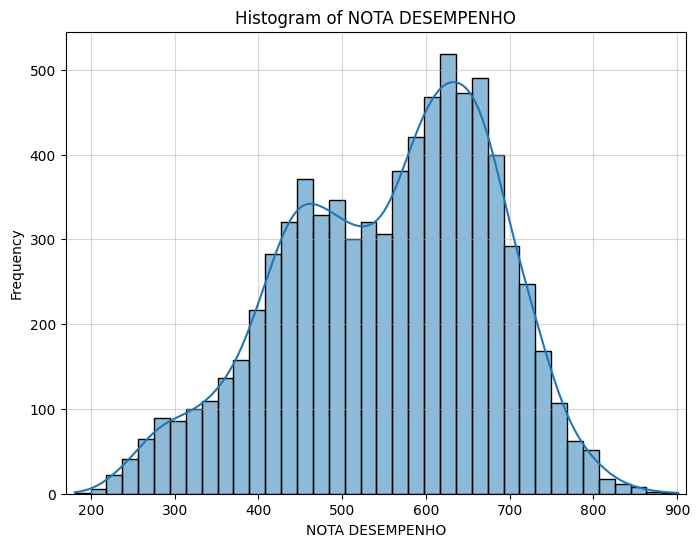

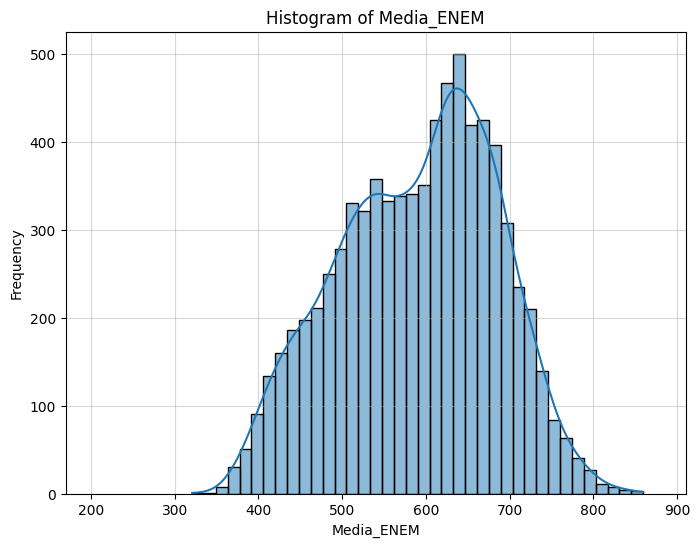

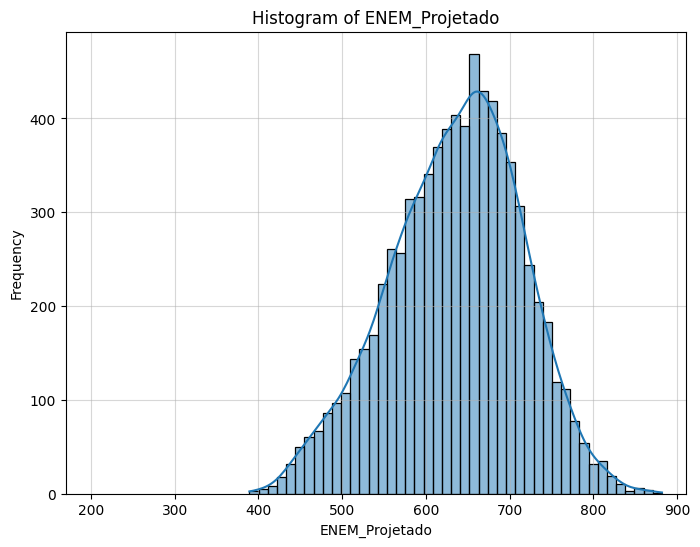

In [ ]:
for column in df_p2.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_p2[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.xlim(170,910)
    plt.grid(True, alpha=0.5)
    plt.show()


In [ ]:
df_p2.describe()

,NOTA DESEMPENHO,Media_ENEM,ENEM_Projetado
count,7725.000000,7725.000000,7725.000000
mean,554.937267,590.078290,635.163572
std,124.943045,93.895734,78.959259
min,180.744569,320.944595,389.313761
25%,460.721047,519.692867,582.118349
50%,573.485685,600.234358,640.721314
75%,652.004081,661.643608,691.483449
max,901.164832,859.282180,881.711465


In [ ]:

new_df = df[['ÁREA', 'NOTA DESEMPENHO', 'Media_ENEM', 'ENEM_Projetado']].copy()

In [ ]:
new_df

,ÁREA,NOTA DESEMPENHO,Media_ENEM,ENEM_Projetado
0,CN,646.164709,646.164709,657.264709
1,MA,703.470689,713.927545,728.627545
2,LI,644.347734,654.713141,667.513141
3,CH,684.606615,684.606615,695.906615
4,MA,585.086031,631.946025,646.646025
...,...,...,...,...
7720,MA,313.593303,433.717349,550.217349
7721,MA,312.616965,432.975623,549.475623
7722,LI,411.365785,489.688948,559.988948
7723,MA,321.278773,439.556015,556.056015


In [ ]:
ch_plotted = new_df[new_df['ÁREA']== 'CH']

In [ ]:
ma_plotted = new_df[new_df['ÁREA']== 'MA']

In [ ]:
li_plotted = new_df[new_df['ÁREA']== 'LI']

In [ ]:
cn_plotted = new_df[new_df['ÁREA']== 'CN']

In [ ]:
ch_plotted, ma_plotted, li_plotted, cn_plotted = ch_plotted.drop(['ENEM_Projetado'], axis=1), ma_plotted.drop(['ENEM_Projetado'], axis=1), li_plotted.drop(['ENEM_Projetado'], axis=1), cn_plotted.drop(['ENEM_Projetado'], axis=1)

In [ ]:
ch_plotted.describe()

,NOTA DESEMPENHO,Media_ENEM
count,1325.000000,1325.000000
mean,626.416793,626.416793
std,92.889875,92.889875
min,374.214798,374.214798
25%,574.466716,574.466716
50%,643.110730,643.110730
75%,691.450135,691.450135
max,850.236430,850.236430


In [ ]:
li_plotted.describe()

,NOTA DESEMPENHO,Media_ENEM
count,2553.000000,2553.000000
mean,545.715662,585.511418
std,111.035876,78.597973
min,180.744569,320.944595
25%,458.548869,524.227674
50%,545.228812,586.714857
75%,632.696323,646.670728
max,852.670096,800.304891


In [ ]:
ma_plotted.describe()

,NOTA DESEMPENHO,Media_ENEM
count,2531.000000,2531.000000
mean,511.630073,578.744194
std,146.091765,105.009785
min,209.475769,354.619053
25%,393.190477,494.187478
50%,513.692009,583.612526
75%,630.586957,663.968020
max,901.164832,850.830980


In [ ]:
cn_plotted.describe()


,NOTA DESEMPENHO,Media_ENEM
count,1316.000000,1316.000000
mean,584.149190,584.149190
std,90.774821,90.774821
min,378.213761,378.213761
25%,516.062924,516.062924
50%,594.984113,594.984113
75%,646.946194,646.946194
max,859.282180,859.282180


##Conclusão

Acredito que tenha sido proposital, mas o simulado dos cadernos de Ciências Naturais e Ciências humanas estão idênticos, o que ou pode ser um erro do dataset **inteiro** ou indica que a elaboração da prova foi magnifica para estes cadernos. Em contrapartida, as matérias de Matemática e Linguagens estão ligeiramente inferiores de um modo geral. O que é interessante pois **RETOMA** ao primeiro gráfico da nossa EDA que demonstrava a dificuldade dos alunos com essas matérias. Com este segundo gráfico, que agora relaciona com a nota do Enem e que sabemos que estão fortemente correlacionadas. Podemos inferir que além da dificuldade dos alunos. O simulado não refletiu completamente bem as matérias que foram abordadas no ENEM.